In [2]:
from astropy import units as u
from astropy import constants as c
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import filters
from astropy.convolution import convolve, Gaussian1DKernel
import csv
import pandas as pd
import copy
from scipy.interpolate import CubicSpline
from astropy.modeling.blackbody import blackbody_lambda, blackbody_nu

# ICE 18

## Question 1

In [3]:
def readMyFile(filename):
    spectral_type = []
    T_e = []
    L_Lsun = []
    M_Msun = []
    M_bol = []
    BC = []
    M_V = []
    U_B = []
    B_V = []   

In [3]:
spectra_file = pd.ExcelFile('StellarDataMainSequence.xls')
test_excel = pd.read_excel('StellarDataMainSequence.xls')

In [4]:
test_excel['Spectral Type']

0      O5
1      O6
2      O7
3      O8
4      B0
5      B1
6      B2
7      B3
8      B5
9      B6
10     B7
11     B8
12     B9
13     A0
14     A1
15     A2
16     A5
17     A8
18     F0
19     F2
20     F5
21     F8
22     G0
23     G2
24    Sun
25     G8
26     K0
27     K1
28     K3
29     K4
30     K5
31     K7
32     M0
33     M1
34     M2
35     M3
36     M4
37     M5
38     M6
39     M7
Name: Spectral Type, dtype: object

In [6]:
test_excel

,Spectral Type,T_e(K),L/L_Sun,R/R_Sun,M/M_Sun,M_bol,BC,M_V,U-B,B-V
0,O5,42000,499000.0000,13.40,60.00,-9.51,-4.40,-5.10,-1.190,-0.33
1,O6,39500,324000.0000,12.20,37.00,-9.04,-3.93,-5.10,-1.170,-0.33
2,O7,37500,216000.0000,11.00,NaN,-8.60,-3.68,-4.90,-1.150,-0.32
3,O8,35800,147000.0000,10.00,23.00,-8.18,-3.54,-4.60,-1.140,-0.32
4,B0,30000,32500.0000,6.70,17.50,-6.54,-3.16,-3.40,-1.080,-0.30
5,B1,25400,9950.0000,5.20,NaN,-5.26,-2.70,-2.60,-0.950,-0.26
6,B2,20900,2920.0000,4.10,NaN,-3.92,-2.35,-1.60,-0.840,-0.24
7,B3,18800,1580.0000,3.80,7.60,-3.26,-1.94,-1.30,-0.710,-0.20
8,B5,15200,480.0000,3.20,5.90,-1.96,-1.46,-0.50,-0.580,-0.17
9,B6,13700,272.0000,2.90,NaN,-1.35,-1.21,-0.10,-0.500,-0.15


In [12]:
lumi = Luminosity(test_excel['M/M_Sun'])
lumi

array([  9.52693217e+06,   1.43202609e+06,   2.22112648e+05,
         7.60868006e+04,   2.89327326e+03,   1.07235865e+03,
         1.91140127e+02,   6.62522029e+01,   1.54396608e+01,
         6.43799305e+00,   3.81436344e+00,   1.23498654e+00,
         1.02000000e+00,   4.04853940e-01,   2.12233237e-01,
         7.28241228e-02,   3.17296456e-02,   5.86519690e-03])

In [13]:
rad = Radius(test_excel['M/M_Sun'])
rad

array([ 12.90403656,   9.86741963,   7.57897701,   6.51235037,
         4.09923848,   3.56184083,   2.7901756 ,   2.40149966,
         1.95399428,   1.65271987,   1.45678969,   1.11001731,
         1.06      ,   0.84832735,   0.72601661,   0.56099589,
         0.44591549,   0.24255102])

In [14]:
temp = Temperature(test_excel['M/M_Sun'])
temp_array = np.array(temp)
temp_array

array([ 89269.31419332,  63564.21033972,  45516.06927583,  37565.15404858,
        20908.48153113,  17501.46819608,  12848.39623829,  10626.38480123,
         8185.10993621,   7151.78951144,   6683.19004333,   5775.33794427,
         5634.09068229,   4998.84397452,   4597.87113587,   4003.2775139 ,
         3648.1001249 ,   3243.36497328])

In [15]:
temp_reverse = temp_array[::-1] 
temp_reverse

array([  3243.36497328,   3648.1001249 ,   4003.2775139 ,   4597.87113587,
         4998.84397452,   5634.09068229,   5775.33794427,   6683.19004333,
         7151.78951144,   8185.10993621,  10626.38480123,  12848.39623829,
        17501.46819608,  20908.48153113,  37565.15404858,  45516.06927583,
        63564.21033972,  89269.31419332])

### 1.1

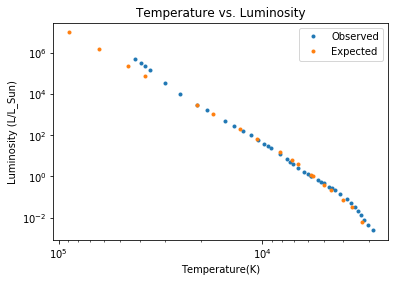

In [16]:
#plotting from the spreadsheet
temp_from_sheet = test_excel['T_e(K)']#[::-1]
plt.loglog(temp_from_sheet, test_excel['L/L_Sun'], '.', label='Observed')
plt.loglog(temp, lumi, '.', label = 'Expected')
plt.legend()
plt.gca().invert_xaxis()
plt.xlabel('Temperature(K)')
plt.ylabel('Luminosity (L/L_Sun)')
plt.title('Temperature vs. Luminosity')
plt.show()

### 1.2

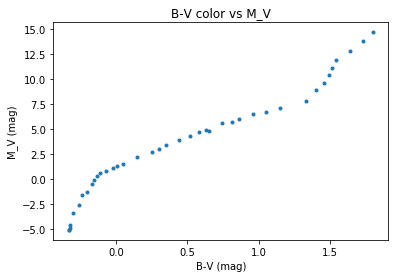

In [17]:
plt.plot(test_excel['B-V'], test_excel['M_V'], '.')
plt.xlabel('B-V (mag)')
plt.ylabel('M_V (mag)')
plt.title('B-V color vs M_V')
plt.show()

### 1.3

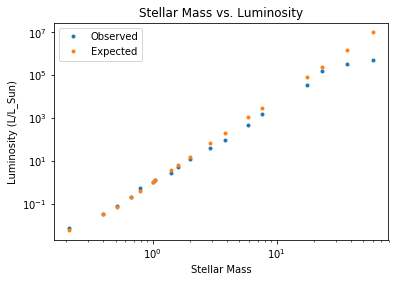

In [18]:
#from spreadsheet
mmsun = test_excel.dropna(subset=['M/M_Sun'])
plt.loglog(test_excel['M/M_Sun'], test_excel['L/L_Sun'], '.', label = 'Observed')
plt.loglog(mmsun['M/M_Sun'], lumi, '.', label = 'Expected')
plt.xlabel('Stellar Mass')
plt.ylabel('Luminosity (L/L_Sun)')
plt.title('Stellar Mass vs. Luminosity')
plt.legend()
plt.show()

### 1.4

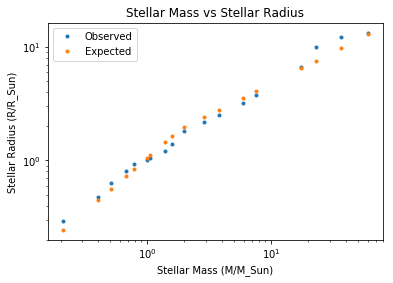

In [19]:
plt.loglog(test_excel['M/M_Sun'], test_excel['R/R_Sun'], '.', label = 'Observed')
rrsun = test_excel.dropna()
plt.loglog(mmsun['M/M_Sun'], rad, '.', label= 'Expected')
plt.legend()
plt.xlabel('Stellar Mass (M/M_Sun)')
plt.ylabel('Stellar Radius (R/R_Sun)')
plt.title('Stellar Mass vs Stellar Radius')
plt.show()

### 1.5

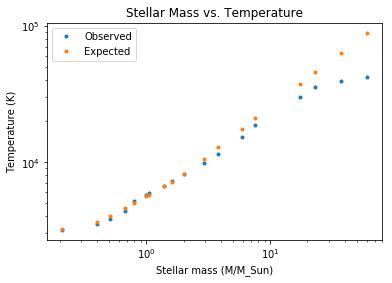

In [20]:
#from sheet
plt.loglog(test_excel['M/M_Sun'], test_excel['T_e(K)'], '.', label='Observed')
plt.loglog(mmsun['M/M_Sun'], temp, '.', label='Expected')
plt.xlabel('Stellar mass (M/M_Sun)')
plt.ylabel('Temperature (K)')
plt.title('Stellar Mass vs. Temperature')
plt.legend()
plt.show()

## Question 2

In [12]:
###### F5V, G0V, K0V, K4V, M0V, M4V, M7V and M1Iab
B8V = logsurfg(3.8, 2.5)
A0V = logsurfg(2.9, 2.2)
A2V = logsurfg(2.2, 2) #guesstimate
A8V = logsurfg(1.8, 1.5) #guesstimate
F5V = logsurfg(1.4, 1.2)
G0V = logsurfg(1.05, 1.06)
K0V = logsurfg(0.79, 0.93)
K4V = logsurfg(0.7, 0.83)
M0V = logsurfg(0.51, 0.63)
M4V = logsurfg(.25, .35)#guesstimate
M7V = logsurfg(0.18, 0.2)#guesstimate
M1Iab = logsurfg(16, 672) #mass is 16 guess, 672, T(e) = 3500
print(B8V, A0V, A2V, A8V, F5V, G0V, K0V, K4V, M0V, M4V, M7V, M1Iab)

4.22197120658 4.21562026356 4.1784303168 4.3411576143 4.42583317089 4.40864519584 4.39872882149 4.44500948257 4.54695670449 4.74787154727 5.09128014108 -0.0125509361486


In [13]:
spectra = [B8V, A0V, A2V, A8V, F5V, G0V, K0V, K4V, M0V, M4V, M7V, M1Iab]
path = '/Users/Rose/Documents/ASTR250/ICE18'
#filenames = path + 
#for spectrum in spectra:
#    spectrum = ReadPheonix(filenames[spectrum])
#    print(spectrum)
#for whatever reason this loop doesn't work so i'm going to do it the stupid way

B8V = ReadPhoenix('B8V.fits')
A0V = ReadPhoenix('A0V.fits')
A2V = ReadPhoenix('A2V.fits')
A8V = ReadPhoenix('A8V.fits')
F5V = ReadPhoenix('F5V.fits')
G0V = ReadPhoenix('G0V.fits')
K0V = ReadPhoenix('K0V.fits')
K4V = ReadPhoenix('K4V.fits')
M0V = ReadPhoenix('M0V.fits')
M4V = ReadPhoenix('M4V.fits')
M7V = ReadPhoenix('M7V.fits')
M1Iab = ReadPhoenix('M1Iab.fits')


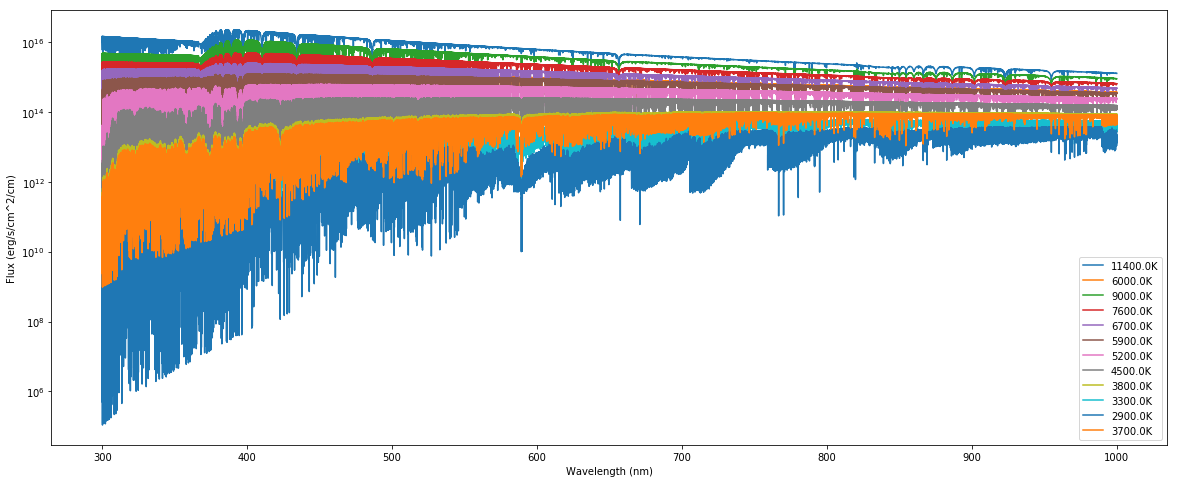

In [15]:
spectra = [B8V, A0V, A2V, A8V, F5V, G0V, K0V, K4V, M0V, M4V, M7V, M1Iab]
plt.figure(figsize=(20,8))
for spectrum in spectra:
    plt.semilogy(spectrum['wave'], spectrum['flux'], label= str(spectrum['hdr']['PHXTEFF'])+'K')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux (erg/s/cm^2/cm)')
plt.legend()
plt.show()

## Question 3

$n>2 \rightarrow n=2$: This is just called the Balmer series. This can be calculated with Rydberg's Formula:
\begin{equation}
\frac{1}{\Lambda} = RZ^2(\frac{1}{n'^2} - \frac{1}{n^2})
\end{equation}

$n = 3 \rightarrow n=2$: 656.3 nm<br>
$n=4 \rightarrow n=2$: 486.1 nm<br>
$n=5 \rightarrow n=2$: 434.0 nm<br>
$n=6 \rightarrow n=2$: 410.2 nm<br>
$n=7 \rightarrow n=2$: 397.0 nm<br>
$n= \infty \rightarrow n=2$: 364.6<br>


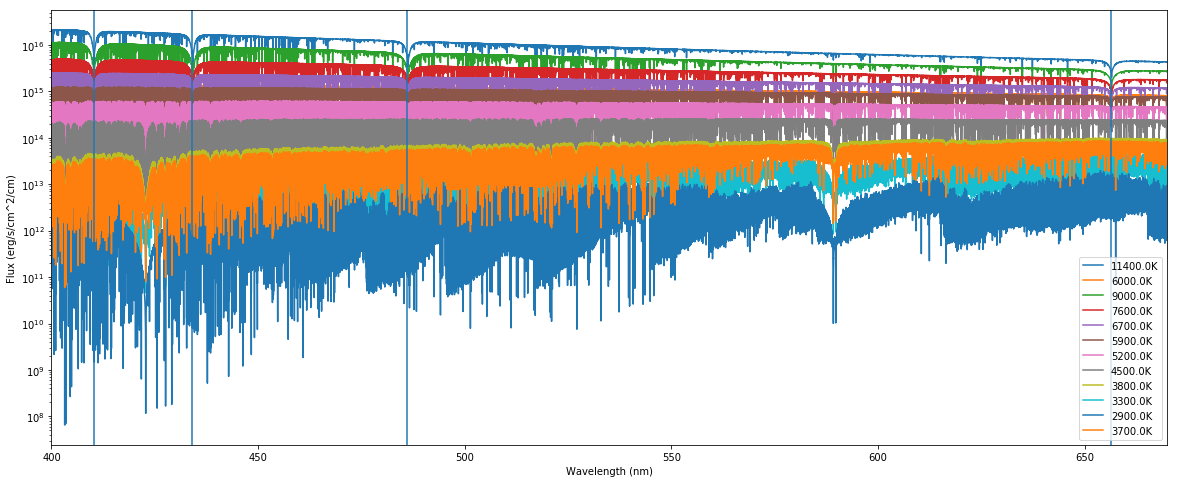

In [51]:
#spectra = [B8V, A0V, A2V, A8V, F5V, G0V, K0V, K4V, M0V, M4V, M7V, M1Iab]
plt.figure(figsize=(20,8))

for spectrum in spectra:
    plt.semilogy(spectrum['wave'], spectrum['flux'], label= str(spectrum['hdr']['PHXTEFF']) + 'K')
plt.legend()
plt.xlim(400, 670)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux (erg/s/cm^2/cm)')
plt.axvline(656.3, label = '656.3')
plt.axvline(486.1, label = '486.1')
plt.axvline(434.0, label = '434.0')
plt.axvline(410.2, label = '410.2')

plt.show()

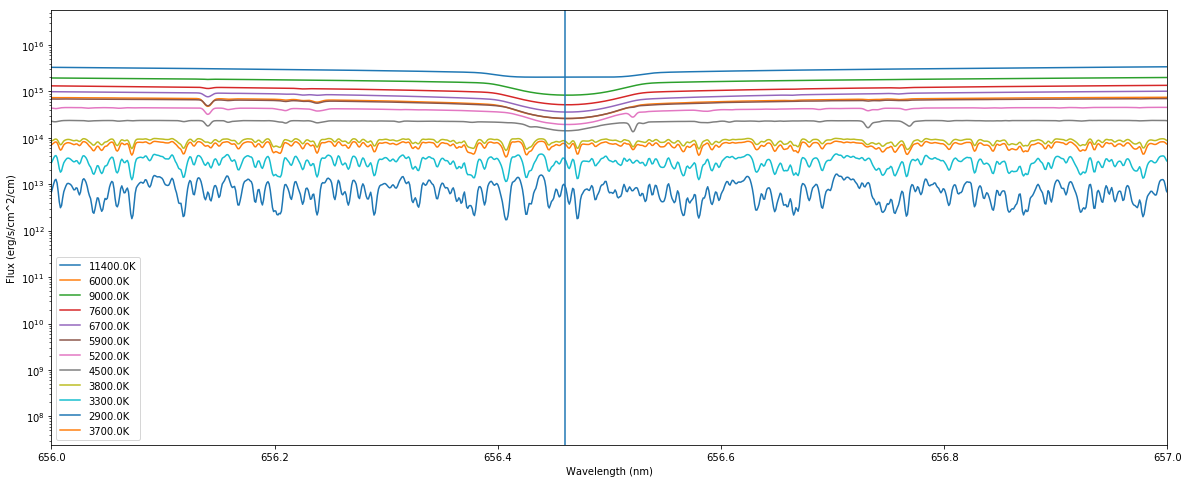

In [50]:
plt.figure(figsize=(20,8))

for spectrum in spectra:
    plt.semilogy(spectrum['wave'], spectrum['flux'], label= str(spectrum['hdr']['PHXTEFF'])+ 'K')
plt.legend()
plt.xlim(656, 657)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux (erg/s/cm^2/cm)')
plt.axvline(656.46, label = '656.45')
plt.axvline(486.1, label = '486.1')
plt.axvline(434.0, label = '434.0')
plt.axvline(410.2, label = '410.2')

plt.show()

The most narrowest line is the grey with $T_{eff} = 4500K$. This corresponds to the K4 star.
The widest line is the one with the $T_{eff} = 11400K$. This corresponds to the B8 star.  
The width of the line gets narrower down the graph, and the bottom 4 lines do not experience a dip ~656.45nm.


# ICE 19

## Q1

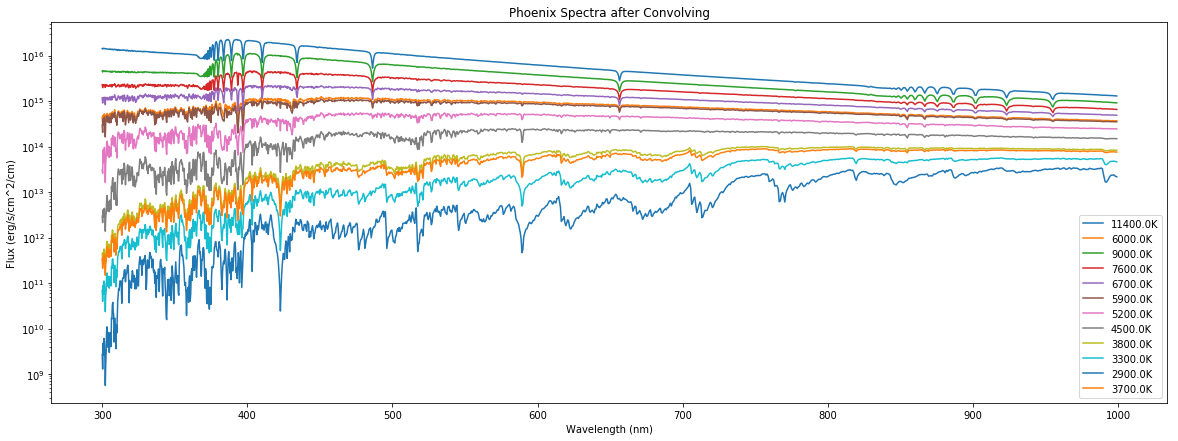

In [21]:
plt.figure(figsize=(20,7))
for spectrum in spectra:
    wavelength_lowres, flux_lowres = LogConvolve(spectrum['wave'], spectrum['flux'], R=1000,downsample = True)
    plt.semilogy(wavelength_lowres, flux_lowres, label= str(spectrum['hdr']['PHXTEFF']) + 'K')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux (erg/s/cm^2/cm)')
plt.title('Phoenix Spectra after Convolving')
plt.legend()
plt.show()

Visually, there is a lot less noise and information and the lines look much cleaner. This is to be expected because since this does decrease the resolution, it can be expected that less information passes through. The features that disappear are the large-amplitude lines at lower wavelengths that were visible previously. However, the Balmer series lines remain present in the top lines. In short, the derivative along the line has decreased significantly.

## Q2

In [95]:
A0V['wave']

array([ 399.9996,  400.0002,  400.0008, ...,  899.997 ,  899.998 ,  899.999 ])

In [19]:
#spectra = [B8V, A0V, A2V, A8V, F5V, G0V, K0V, K4V, M0V, M4V, M7V, M1Iab]

Bfilt = StandardFilter('B')(A0V['wave'])
Vfilt = StandardFilter('V')(A0V['wave'])
Rfilt = StandardFilter('R')(A0V['wave'])
Ifilt = StandardFilter('I')(A0V['wave'])
Ufilt = StandardFilter('U')(A0V['wave'])


In [100]:
Bfilt

array([  9.46992184e-001,   9.47003908e-001,   9.47015630e-001, ...,
         4.87239244e-223,   3.24210658e-223,   1.61796490e-223])

In [15]:
B8V['wave']

array([ 300.    ,  300.0006,  300.0012, ...,  999.997 ,  999.998 ,  999.999 ])

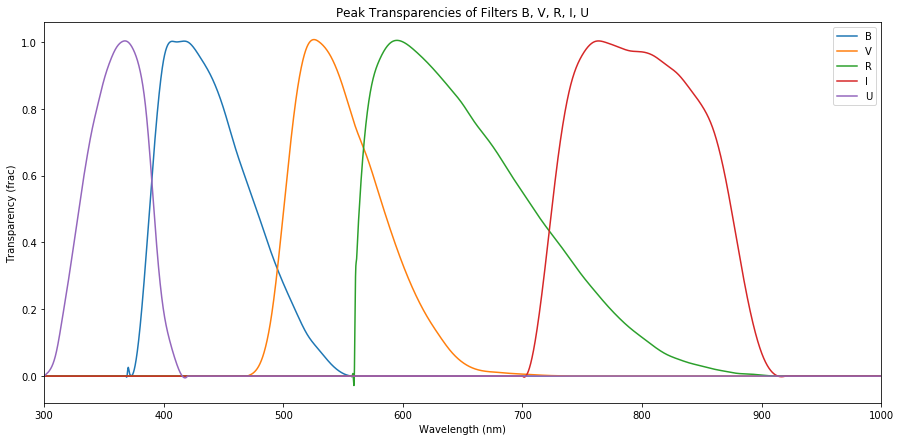

In [22]:
filters = ['B','V','R','I','U']
plt.figure(figsize=(15,7))
plt.xlim(300, 1000)
for i in filters:
    filt = StandardFilter(i)(A0V['wave'])
    plt.plot(A0V['wave'],filt, label= str(i))
plt.legend()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transparency (frac)')
plt.title('Peak Transparencies of Filters B, V, R, I, U')
plt.show()
#function = StandardFilter(spectra)

In [54]:
types = filters = ['B','V','R','I','U']
filters_width = []
filters_mean = []
for i in types:
    lambda_d = StandardFilter(i)(A0V['wave'])
    calc = A0V['wave'] * StandardFilter(i)(A0V['wave'])
    width = np.trapz(lambda_d, A0V['wave'])
    filters_width.append(width)
    mean = np.trapz(calc, A0V['wave'])/width
    filters_mean.append(mean)
    
    
dat = {'Filters': filters, 'Width': filters_width, 'Mean': filters_mean}

In [55]:
datshow = pd.DataFrame(data=dat)
datshow   

,Filters,Mean,Width
0,B,439.301790,91.452271
1,V,549.919274,87.682749
2,R,654.892436,149.229015
3,I,799.399887,143.114973
4,U,360.318644,62.146032


# Question 3

In [23]:
F0_U = 4.19e-9
F0_B = 6.6e-9
F0_V = 3.55e-9

#given #U, B, V
targets = ['U', 'B', 'V']
f_u = []
f_b = []
f_v = []
F_x = [f_u, f_b, f_v]
spectra = [B8V, A0V, A2V, A8V, F5V, G0V, K0V, K4V, M0V, M4V, M7V, M1Iab]

#lambda_d_U = StandardFilter('U')(A0V['wave'])
#lambda_d_B = StandardFilter('B')(A0V['wave'])
#lambda_d_V = StandardFilter('V')(A0V['wave'])

#F_x_U = 1/lambda_d * np.trapz(Ufilt(A0V['wave'])['flux'])
#F_x_B = 1/lambda_d * np.trapz(Bfilt(A0V['wave'])['flux'])
#F_x_V = 1/lambda_d * np.trapz(Vfilt(A0V['wave'])['flux'])

for j in range(len((targets))):
    for i in spectra:
        lambda_d = StandardFilter(targets[j])(A0V['wave'])
        calc = A0V['wave'] * StandardFilter(targets[j])(A0V['wave'])
        width = np.trapz(lambda_d, A0V['wave'])
        f = 1/width * np.trapz(StandardFilter(targets[j])(A0V['wave'])*A0V['flux'])
        F_x[j].append(f)
             

#def m_x(F, F0):
#    return (-2.5*np.log10(F/F0))

#did not get part 2
    

In [98]:
F_x

[[1.0638586476500806e+18, 1.0638586476500806e+18, 1.0638586476500806e+18],
 [1.6728481998967844e+18, 1.6728481998967844e+18, 1.6728481998967844e+18],
 [1.0398268798555526e+18, 1.0398268798555526e+18, 1.0398268798555526e+18]]

In [36]:
B8V

{'flux': array([  1.45544448e+16,   1.45548399e+16,   1.45549731e+16, ...,
          1.28292270e+15,   1.28290700e+15,   1.28289103e+15], dtype=float32),
 'hdr': SIMPLE  =                    T / conforms to FITS standard                      
 BITPIX  =                  -32 / array data type                                
 NAXIS   =                    1 / number of array dimensions                     
 NAXIS1  =              1569128                                                  
 EXTEND  =                    T                                                  
 EXTNAME = 'PRIMARY '                                                            
 WAVE    = '../../WAVE_PHOENIX-ACES-AGSS-COND-2011.fits' / Wavelength array      
 PHXTEFF =              11400.0 / [K] effective temperature                      
 PHXLOGG =                  4.0 / [cm/s^2] log (surface gravity)                 
 PHXM_H  =                  0.0 / [M/H] metallicity (rel. sol. - Asplund &a 2009)
 PHXALPHA=         

In [4]:
def logsurfg(M,R):
    return np.log10(((c.G*c.M_sun*M/np.power(R*c.R_sun,2)).to(u.cm/u.s**2)).value)

''' Functions that calculate stellar properties '''

def IsScalar(x):
    Scalar = False
    try:
        len(x)
    except:
        Scalar = True
    return Scalar

def Luminosity(Mass,cont=True):
    """ Mass is assumed to be in stellar masses, and luminosity is returned in stellar radii """
    if cont:
        M0 = np.power(0.35/1.02,1./(3.92-2.62)) 
    else: 
        M0 = 0.7    
    L = []
    if (IsScalar(Mass)):
        Mass = np.array([Mass])
    for M in Mass:
        if M <= M0:
            L.append(0.35 * np.power(M,2.62))
        if M > M0:
            L.append(1.02 * np.power(M,3.92))
    return np.array(L)

def Radius(Mass,cont=True):
    """ Mass is assumed to be in stellar masses, and radius is returned in stellar radii """
    if cont:
        M0 = np.power(1.06/1.33,1./(0.555-0.945)) 
    else: 
        M0 = 1.33  
    R = []
    if (IsScalar(Mass)):
        Mass = np.array([Mass])
    for M in Mass:
        if M <= M0:
            R.append(1.06 * np.power(M,0.945))
        if M > M0:
            R.append(1.33 * np.power(M,0.555))
    return np.array(R)

def Temperature(M):
    """ Mass is assumed to be in stellar masses, but temperature is returned in Kelvin """
    L = Luminosity(M)*c.L_sun
    R = Radius(M)*c.R_sun
    T = np.power(4.*np.pi*np.power(R,2)*c.sigma_sb/L,-1./4.)
    return T

In [5]:
def ReadPhoenix(filename,wave0=300,wave1=1000,wavepath=''):

    #Load wavelengths
    Atonm = 0.1 #convert  Angstroms to nm
    with fits.open(wavepath+'WAVE_PHOENIX-ACES-AGSS-COND-2011.fits') as f:
        wave = Atonm * f[0].data
    
    # Load data
    with fits.open(filename) as f:
        flux = f[0].data
        hdr = f[0].header

    # Cut out wavelengths as requested
    wlo = np.where(np.diff((wave > wave0).astype(int)) == 1)[0][0]
    whi = np.where(np.diff((wave > wave1).astype(int)) == 1)[0][0]

    return {'wave': wave[wlo:whi], 'flux': flux[wlo:whi], 'hdr':hdr}

In [6]:
def LogConvolve(wavelength,rawSpectrum,R,downsample = False):
    # in general we will want to take an arbitrary spectrum and re-sample it
    # to be log-spaced 
    wvl_min = min(wavelength)
    wvl_max = max(wavelength)
    
    # Make our own internal sampling of the spectrum and wavelengths with 
    # a known R_internal.  This is not the right way to do this, since it's
    # hard coded.  Should determine it based on either user input or 
    # maximum R necessary to reproduce the input spectrum.
    R_internal = 600000.
    
    # calculate the number of points to include in the resampling
    n = int(round(np.log10(wvl_max/wvl_min)/np.log10(1+1/R_internal)))
    
    # recalculate the max wavelength for the resampling
    lambdamin = wvl_min
    lambdamax = lambdamin * np.power(1+1/(R_internal),n)
    
    logmin = np.log10(lambdamin)
    logmax = np.log10(lambdamax)
    
    # set up the log-spaced wavelength points to resample at
    logwavelength = np.logspace(logmin,logmax,num=n,base=10)
    
    # interpolate the spectrum values at the log-spaced points
    logspec = np.interp(logwavelength,wavelength,rawSpectrum)
    
    # the kernel to convolve with (has width of the ratio of R values)
    fwhm = R_internal/R
    sigma = fwhm/2.35
    gaussian = Gaussian1DKernel(sigma)
    
    # actually do the convolution
    convolvedSpectrum = convolve(logspec,gaussian,normalize_kernel=True,boundary='extend')
    
    # You can leave the actual spacing of the channels at the input resolution, or 
    # choose to only critically sample the result
    if downsample:
        downsample_fac = int(fwhm)
        indx = np.arange(0,len(logwavelength),downsample_fac)
        logwavelength = logwavelength[indx]
        convolvedSpectrum = convolvedSpectrum[indx]
        
    return logwavelength, convolvedSpectrum

In [18]:
def StandardFilter(filtername):
    filter_path = ''
    filters = ['B','V','R','I','U']
    filter_found = False
    for filter in filters:
        if filtername == filter:
            filter_found = True
    if filter_found:
        wvl,filt = np.loadtxt(filter_path+filtername+'.txt',unpack=True)
        wvl /= 10. # nm
        # Need to pad with zeros outside the defined range
        wvl_min = 200.
        wvl_max = 1100.
        nwvl = 1000
        iwvl = np.linspace(wvl_min,wvl_max,num=nwvl)
        ifilt = np.zeros(nwvl)
        wh = np.logical_and(iwvl>wvl.min(),iwvl<wvl.max())
        ifilt[wh] = CubicSpline(wvl,filt)(iwvl[wh]) #np.interp(iwvl[wh],wvl,filt)
        synthfilt = CubicSpline(iwvl,ifilt)
        return synthfilt
    else:
        print('Filter name not found.')
        return 0